            Model  Mean IoU  Precision  Recall  F1 Score
0           U-Net      48.0       77.0    58.0      62.0
1             FCN      44.0       67.0    59.0      59.0
2       DeepLabV3      46.0       66.0    63.0      60.0
3            YOLO      62.0       64.0    60.0      62.0
4    Faster R-CNN      54.0       86.0    59.0      63.0
5  Grounding DINO      45.0       80.0    46.0      53.0


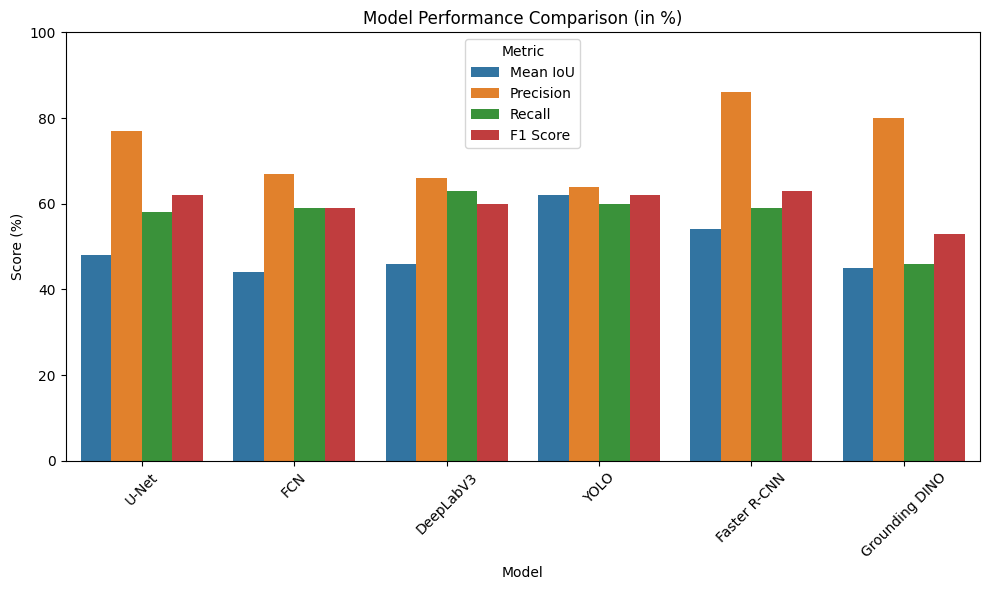

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define data and multiply scores by 100
data = {
    "Model": ["U-Net", "FCN", "DeepLabV3", "YOLO", "Faster R-CNN", "Grounding DINO"],
    "Mean IoU": [x * 100 for x in [0.48, 0.44, 0.46, 0.62, 0.54, 0.45]],
    "Precision": [x * 100 for x in [0.77, 0.67, 0.66, 0.64, 0.86, 0.80]],
    "Recall": [x * 100 for x in [0.58, 0.59, 0.63, 0.60, 0.59, 0.46]],
    "F1 Score": [x * 100 for x in [0.62, 0.59, 0.60, 0.62, 0.63, 0.53]]
}

# Create DataFrame
df = pd.DataFrame(data)
print(df)

# Melt DataFrame for plotting
df_melted = df.melt(id_vars=["Model"], var_name="Metric", value_name="Score")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric")
plt.title("Model Performance Comparison (in %)")
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Set limit to 100 for percentages
plt.ylabel("Score (%)")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


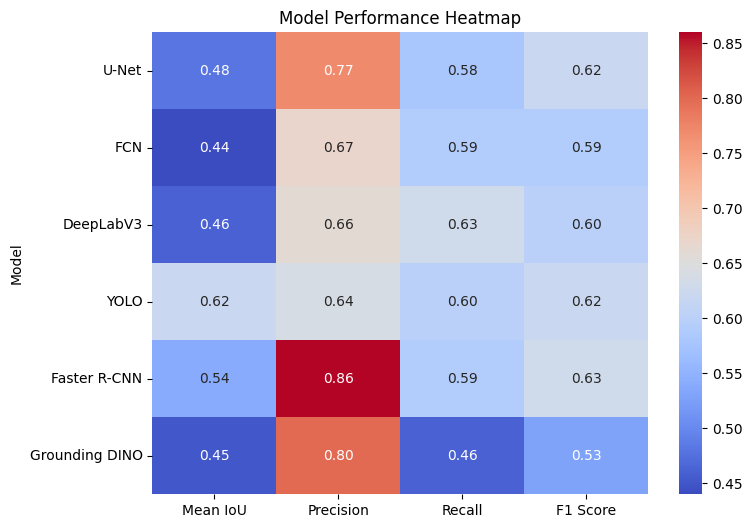

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define data
data = {
    "Model": ["U-Net", "FCN", "DeepLabV3", "YOLO", "Faster R-CNN", "Grounding DINO"],
    "Mean IoU": [0.48, 0.44, 0.46, 0.62, 0.54, 0.45],
    "Precision": [0.77, 0.67, 0.66, 0.64, 0.86, 0.80],
    "Recall": [0.58, 0.59, 0.63, 0.60, 0.59, 0.46],
    "F1 Score": [0.62, 0.59, 0.60, 0.62, 0.63, 0.53]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set the 'Model' column as the index
df.set_index("Model", inplace=True)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap="coolwarm", fmt=".2f")

# Title
plt.title("Model Performance Heatmap")

# Show the plot
plt.show()


In [1]:
import pandas as pd

# Define models and their predicted WWR values
models = ["U_net", "FCN", "deeplab3", "yolo", "faster_rcnn", "GD"]
predicted_wwr = [0.1, 0.121, 0.14, 0.154, 0.055, 0.211]

# Ground truth WWR
ground_truth = 0.15

# Calculate absolute errors
errors = [abs(pred - ground_truth) for pred in predicted_wwr]

# Create a DataFrame for better visualization
df = pd.DataFrame({"Model": models, "Predicted WWR": predicted_wwr, "Absolute Error": errors})

# Print the results
print(df)

# Optional: Sort models by lowest error
df_sorted = df.sort_values(by="Absolute Error")
print("\nSorted by Absolute Error:")
print(df_sorted)


         Model  Predicted WWR  Absolute Error
0        U_net          0.100           0.050
1          FCN          0.121           0.029
2     deeplab3          0.140           0.010
3         yolo          0.154           0.004
4  faster_rcnn          0.055           0.095
5           GD          0.211           0.061

Sorted by Absolute Error:
         Model  Predicted WWR  Absolute Error
3         yolo          0.154           0.004
2     deeplab3          0.140           0.010
1          FCN          0.121           0.029
0        U_net          0.100           0.050
5           GD          0.211           0.061
4  faster_rcnn          0.055           0.095


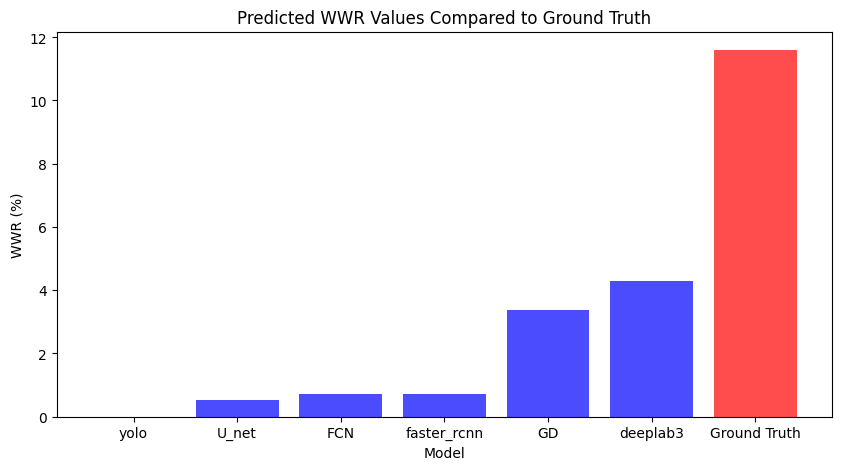

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Define models and their predicted WWR values (converted to percentages)
models = ["U_net", "FCN", "deeplab3", "yolo", "faster_rcnn", "GD", "Ground Truth"]
predicted_wwr = [x * 100 for x in [
0.0054,
0.0073,
0.0429,
0,
0.0073,
0.0337,
    0.116
]]  # Multiplied by 100 for percentages

# Sort models by WWR values
sorted_indices = np.argsort(predicted_wwr)
models = [models[i] for i in sorted_indices]
predicted_wwr = [predicted_wwr[i] for i in sorted_indices]

# Define colors: blue for models, red for ground truth
colors = ['blue' if model != "Ground Truth" else 'red' for model in models]

# Create the bar plot
plt.figure(figsize=(10, 5))
plt.bar(models, predicted_wwr, color=colors, alpha=0.7)

# Add labels and title
plt.ylabel("WWR (%)")
plt.xlabel("Model")
plt.title("Predicted WWR Values Compared to Ground Truth")
plt.grid(False)

# Show the plot
plt.show()
